In order to successfully complete this assignment you need to participate both individually and in groups during class on **Wednesday March 18**.

# In-Class Assignment: Preditor-Pray Data Fitting


<img src="https://cdn.pixabay.com/photo/2016/06/14/15/46/cat-1456878_1280.png" width=75%>

Image from [pixabay](https://pixabay.com/)

### Agenda for today's class (80 minutes)



1. [(20 minutes) Review pre-class Assignment](#Review_pre-class_assignment)
1. [(20 minutes) ODE Parameter Fitting](#ODE_Parameter_Fitting)
1. [(20 minutes) Timing Brute Force Search](#Timing_Brute_force_search)
1. [(20 minutes) Unrolling Loops on the HPC using Job Arrays](#Unrolling_Loops)


----
<a name="Review_pre-class_assignment"></a>

# 1. Review pre-class Assignment

- [0317--ARGV-pre-class-assignment](0317--ARGV-pre-class-assignment.ipynb)

----
<a name="ODE_Parameter_Fitting"></a>

# 2. Population Data

The following example example data comes from https://mathematica.stackexchange.com/questions/34761/find-parameters-of-odes-to-fit-solution-data and represents some experimental data ```time```, ```x``` and ```y```.

&#9989; **<font color=red>DO THIS:</font>** Run the following code and plot the data.


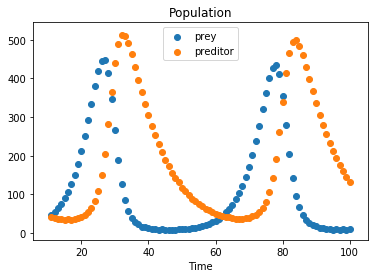

In [47]:
# (* The first column is time 't', the second column is coordinate 'x', and the last column is coordinate 'y'. *)
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np

data=[[11,45.79,41.4],
      [12,53.03,38.9],[13,64.05,36.78],
      [14,75.4,36.04],[15,90.36,33.78],
      [16,107.14,35.4],[17,127.79,34.68],
      [18,150.77,36.61], [19,179.65,37.71],
      [20,211.82,41.98],[21,249.91,45.72],
      [22,291.31,53.1],[23,334.95,65.44],
      [24,380.67,83.],[25,420.28,108.74],
      [26,445.56,150.01],[27,447.63,205.61],
      [28,414.04,281.6],[29,347.04,364.56],
      [30,265.33,440.3],[31,187.57,489.68],
      [32,128.,512.95],[33,85.25,510.01],
      [34,57.17,491.06],[35,39.96,462.22],
      [36,29.22,430.15],[37,22.3,396.95],
      [38,16.52,364.87],[39,14.41,333.16],
      [40,11.58,304.97],[41,10.41,277.73],
      [42,10.17,253.16],[43,7.86,229.66],
      [44,9.23,209.53],[45,8.22,190.07],
      [46,8.76,173.58],[47,7.9,156.4],
      [48,8.38,143.05],[49,9.53,130.75],
      [50,9.33,117.49],[51,9.72,108.16],
      [52,10.55,98.08],[53,13.05,88.91],
      [54,13.58,82.28],[55,16.31,75.42],
      [56,17.75,69.58],[57,20.11,62.58],
      [58,23.98,59.22],[59,28.51,54.91],
      [60,31.61,49.79],[61,37.13,45.94],
      [62,45.06,43.41],[63,53.4,41.3],
      [64,62.39,40.28],[65,72.89,37.71],
      [66,86.92,36.58],[67,103.32,36.98],
      [68,121.7,36.65],[69,144.86,37.87],
      [70,171.92,39.63],[71,202.51,42.97],
      [72,237.69,46.95],[73,276.77,54.93],
      [74,319.76,64.61],[75,362.05,81.28],
      [76,400.11,105.5],[77,427.79,143.03],
      [78,434.56,192.45],[79,410.31,260.84],
      [80,354.18,339.39],[81,278.49,413.79],
      [82,203.72,466.94],[83,141.06,494.72],
      [84,95.08,499.37],[85,66.76,484.58],
      [86,45.41,460.63],[87,33.13,429.79],
      [88,25.89,398.77],[89,20.51,366.49],
      [90,17.11,336.56],[91,12.69,306.39],
      [92,11.76,279.53],[93,11.22,254.95],
      [94,10.29,233.5],[95,8.82,212.74],
      [96,9.51,193.61],[97,8.69,175.01],
      [98,9.53,160.59],[99,8.68,146.12],[100,10.82,131.85]]
data = np.array(data)
t = data[:,0]
x = data[:,1]
y = data[:,2]
plt.scatter(t,x)
plt.scatter(t,y)
plt.legend(('prey', 'preditor'))
plt.xlabel('Time')
plt.title('Population');

This data seems to fit the classic Lotka-Volterra Predator-prey:

https://en.wikipedia.org/wiki/Lotka%E2%80%93Volterra_equationsResearchers 

$$dx = \alpha x - \beta xy$$
$$dy' = -\gamma y + \delta xy$$

These equations can be representied by the simple ODE function

In [49]:
from scipy.integrate import odeint

# The above ODE model sutiable for ODEINT
def deriv(position,t,a,b,c,d):
    x = position[0]
    y = position[1]
    dx = a*x - b*x*y
    dy = -c*y + d*x*y
    return (dx,dy)

# Initial conditions vector
x0 = data[0,1]
y0 = data[0,2]

#Time Vector 
t = data[:,0]

The trick is we don't know the values for ```a,b,c,``` and ```d``` ($\alpha, \beta, \gamma, \delta$). Lets say we know that variables ```a,c``` are in the range [0,1] and ```b,d``` are in the range [0,0.01].  Here is a guess that works okay:

In [51]:
a = 0.2
b = 0.001
c = 0.1
d = 0.001

In [52]:
##ANSWSER##
##Brute force solution
a,b,c,d = 0.22222222222222224, 0.0013131313131313131, 0.10101010101010102, 0.0009090909090909091
##ANSWER##

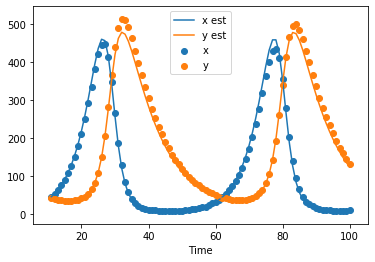

In [53]:
# Integrate equations over the time grid, t.
ret = odeint(deriv, (x0,y0), t, args=(a,b,c,d))

#Plot the model on the data
plt.plot(t,ret)
plt.scatter(t, data[:,1])
plt.scatter(t, data[:,2]);
plt.legend(('x est', 'y est', 'x', 'y'))
plt.xlabel('Time');

Eyeballing a graph is fine but it is generally better to use some for of measureable error:

In [54]:
def rmse(a,b):
    return np.sqrt(np.mean((a-b)**2))

In [55]:
rmse(data[:,1], ret[:,0])+ rmse(data[:,2], ret[:,1])

23.467733125498725

&#9989; **<font color=red>DO THIS:</font>** Modifiy ```a,b,c,d``` above and find a better fit for the model. Be prepared to share your results with the class.

$${\displaystyle A^{+}=(A^{*}A)^{-1}A^{*}.}$$

---
<a name="Timing_Brute_force_search"></a>

# 3. Timing Brute Force Search

Now lets try to solve the problem using brute force. Here is a simple nested loop:

In [ ]:
%%time 
minerr = 9999999
mina,minb,minc,mind = 0,0,0,0
for a in np.linspace(0,1,10):
    print(a)
    for b in np.linspace(0,0.01, 10):
        for c in np.linspace(0,1,10):
            for d in np.linspace(0,0.01,10):
                ret = odeint(deriv, (x0,y0), t, args=(a,b,c,d))
                err = rmse(data[:,1], ret[:,0]) + rmse(data[:,2], ret[:,1])
                if err < minerr:
                    minerr = err
                    mina, minb,minc,mind = a,b,c,d
print(f"Current Best: {minerr} ({a}, {b}, {c}, {d})")   

#See our model so far
ret = odeint(deriv, (x0,y0), t, args=(mina,minb,minc,mind))
print(rmse(data[:,1], ret[:,0])+ rmse(data[:,2], ret[:,1]))

plt.plot(t,ret)
plt.scatter(t, data[:,1])
plt.scatter(t, data[:,2]);
plt.legend(('x est', 'y est', 'x', 'y'))
plt.xlabel('Time');

The above result is a little better but what if we tried all possible values for ```a,b,c,d```?  The following script tries 100 values for variables ```a,b,c,d```?  

In [ ]:
%%writefile bruteforce.py
import numpy as np
from scipy.integrate import odeint

data=[[11,45.79,41.4],
      [12,53.03,38.9],[13,64.05,36.78],
      [14,75.4,36.04],[15,90.36,33.78],
      [16,107.14,35.4],[17,127.79,34.68],
      [18,150.77,36.61], [19,179.65,37.71],
      [20,211.82,41.98],[21,249.91,45.72],
      [22,291.31,53.1],[23,334.95,65.44],
      [24,380.67,83.],[25,420.28,108.74],
      [26,445.56,150.01],[27,447.63,205.61],
      [28,414.04,281.6],[29,347.04,364.56],
      [30,265.33,440.3],[31,187.57,489.68],
      [32,128.,512.95],[33,85.25,510.01],
      [34,57.17,491.06],[35,39.96,462.22],
      [36,29.22,430.15],[37,22.3,396.95],
      [38,16.52,364.87],[39,14.41,333.16],
      [40,11.58,304.97],[41,10.41,277.73],
      [42,10.17,253.16],[43,7.86,229.66],
      [44,9.23,209.53],[45,8.22,190.07],
      [46,8.76,173.58],[47,7.9,156.4],
      [48,8.38,143.05],[49,9.53,130.75],
      [50,9.33,117.49],[51,9.72,108.16],
      [52,10.55,98.08],[53,13.05,88.91],
      [54,13.58,82.28],[55,16.31,75.42],
      [56,17.75,69.58],[57,20.11,62.58],
      [58,23.98,59.22],[59,28.51,54.91],
      [60,31.61,49.79],[61,37.13,45.94],
      [62,45.06,43.41],[63,53.4,41.3],
      [64,62.39,40.28],[65,72.89,37.71],
      [66,86.92,36.58],[67,103.32,36.98],
      [68,121.7,36.65],[69,144.86,37.87],
      [70,171.92,39.63],[71,202.51,42.97],
      [72,237.69,46.95],[73,276.77,54.93],
      [74,319.76,64.61],[75,362.05,81.28],
      [76,400.11,105.5],[77,427.79,143.03],
      [78,434.56,192.45],[79,410.31,260.84],
      [80,354.18,339.39],[81,278.49,413.79],
      [82,203.72,466.94],[83,141.06,494.72],
      [84,95.08,499.37],[85,66.76,484.58],
      [86,45.41,460.63],[87,33.13,429.79],
      [88,25.89,398.77],[89,20.51,366.49],
      [90,17.11,336.56],[91,12.69,306.39],
      [92,11.76,279.53],[93,11.22,254.95],
      [94,10.29,233.5],[95,8.82,212.74],
      [96,9.51,193.61],[97,8.69,175.01],
      [98,9.53,160.59],[99,8.68,146.12],[100,10.82,131.85]]
data = np.array(data)

x0 = data[0,1]
y0 = data[0,2]
t = data[:,0]

# The SIR model differential equations.
def deriv(position,t,a,b,c,d):
    x = position[0]
    y = position[1]
    dx = a*x - b*x*y
    dy = -c*y + d*x*y
    return (dx,dy)

def rmse(a,b):
    return np.sqrt(np.mean((a-b)**2))

minerr = 9999999
mina,minb,minc,mind = 0,0,0,0

for a in np.linspace(0,1,100):
    print(a)
    for b in np.linspace(0,0.01, 100):
        for c in np.linspace(0,1,100):
            for d in np.linspace(0,0.01,100):
                ret = odeint(deriv, (x0,y0), t, args=(a,b,c,d))
                err = rmse(data[:,1], ret[:,0]) + rmse(data[:,2], ret[:,1])
                if err < minerr:
                    minerr = err
                    mina, minb,minc,mind = a,b,c,d
    print(f"Current Best: {minerr} : ({mina}, {minb}, {minc}, {mind})")


This script can be run on the command line by typing ```python bruteforce.py```. 

&#9989; **<font color=red>QUESTION:</font>** Given the time estimate above, estimate how long will this script take to run? Be prepaired to share your estimate with the class.

In [ ]:
# Put your estimation code here.

---
<a name="Unrolling_Loops"></a>

# 4. Unrolling Loops on the HPC using Job Arrays

Clearly the above brute force method will take a long time. We can "unroll one of the loops" and run the system in parallel on the HPC.  Rewrite the above script to remove the loop over ```a``` and instead pass in an index from 0-100.  

&#9989; **<font color=red>QUESTION:</font>** How long will this new script take to run for a single value of ```a```?

We can run all of 100 different indexes for a using the following HPC submission script:

In [ ]:
%%writefile hpc_bruteforce.sb
#!/bin/bash --login
#SBATCH -c 1
#SBATCH -n 1
#SBATCH --time=2:00:00
#SBATCH --mem=2gb
#SBATCH --array 1-100
#SBATCH --mail-type=END

#Log a copy of this script in the output file
cat $0

#Run BruteForce Script on a single value for variabe a
srun --unbuffered python bruteforce.py ${SLURM_ARRAY_TASK_ID} 

module load powertools
js -j $SLURM_JOB_ID

echo "Done"

############################

&#9989; **<font color=red>DO THIS:</font>** Copy the unrolled ```bruteforce.py``` and the following ```hpc_bruteforce.sb``` scripts to the HPC.  Run the script using the following command on a development node:


```bash
sbatch hpc_bruteforce.sb
```

You can monitor the status of your jobs using the ```sq``` command. If everything went correctly there should be 100 jobs in your queue.  

&#9989; **<font color=red>DO THIS:</font>** Assuming the above works, we will have 100 files starting with the word ```slurm```. Each one represents the output of each of the 100 scripts.  We can find the best result using some simple bash commands:

```bash
grep -a -e "Current Best" slurm* | cut -d ":" -f 3 | sort -n | head -n 1
```

The above bash command uses arguments to "pip" together multiple commands into one. Here is a summary for what it does:

1. Uses grep (regular expressions) to search all files (-a) that start with "slurm" for the expression (-e) "Current Best"

2. Take the output of the above and pipe (|) it into ```cut``` which will divide each line using the ":" deliminator (-d) and only return the second field (-f). (This should be just the RMSE values)

3. Sort the values numerically (-n)

4. Take the head of the previous output and output exactly 1 number of lines (-n) (smallest sorted value)


&#9989; **<font color=red>DO THIS:</font>** Once you know what is the best RMSE use ```grep``` again to get the rest of the line.  
```bash
grep -a -e "Current Best" slurm* | grep <<REPLACE_WITH_YOUR_BEST_RMSE>>
```


&#9989; **<font color=red>DO THIS:</font>** Using the current best ```a,b,c,d``` values. Rerun the above model and verify it is working.

-----
### Congratulations, we're done!

### Course Resources:

- [Syllabus](https://docs.google.com/document/d/e/2PACX-1vTW4OzeUNhsuG_zvh06MT4r1tguxLFXGFCiMVN49XJJRYfekb7E6LyfGLP5tyLcHqcUNJjH2Vk-Isd8/pub)
- [Preliminary Schedule](https://docs.google.com/spreadsheets/d/e/2PACX-1vRsQcyH1nlbSD4x7zvHWAbAcLrGWRo_RqeFyt2loQPgt3MxirrI5ADVFW9IoeLGSBSu_Uo6e8BE4IQc/pubhtml?gid=2142090757&single=true)
- [D2L Page](https://d2l.msu.edu/d2l/home/912152)
- [Git Repository](https://gitlab.msu.edu/colbrydi/cmse802-s20)

&#169; Copyright 2020,  Michigan State University Board of Trustees